In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt

In [2]:
ufo_df = pd.read_csv("results/ufo_caputre_dbscan_eps_30.csv")
drive = "/run/media/mateusz/Seagate Expansion Drive/all"

for index, row in ufo_df.iterrows():
    p = Path(row['common_pathname'])
    p = drive / p
    ufo_df.at[index, 'file'] = str(p) + ".avi"


In [3]:
ufo_df

,Unnamed: 0,common_filename,common_pathname,cell_id,time_bin_10,box_x_max,box_x_min,box_y_max,box_y_min,centeroid_pixel_x,...,rect_shape_diameter,rect_shape_height,rect_shape_width,rect_x_max,rect_x_min,rect_y_max,rect_y_min,size,solidity,file
0,0,M20190901_060319_USUtah_CRC_N1,CRC/M20190901_060319_USUtah_CRC_N1,27.0,-1,192,0,192,0,1330,...,228.078934,186,132,1403,1271,312,126,310,0.440341,/run/media/mateusz/Seagate Expansion Drive/all...
1,1,M20190901_060319_USUtah_CRC_N1,CRC/M20190901_060319_USUtah_CRC_N1,133.0,-1,192,0,192,0,633,...,31.320920,30,9,636,627,1077,1047,22,0.301370,/run/media/mateusz/Seagate Expansion Drive/all...
2,2,M20190901_060522_USUtah_CRC_N1,CRC/M20190901_060522_USUtah_CRC_N1,136.0,-1,192,0,192,0,1040,...,172.185946,148,88,1083,995,1058,910,393,0.601838,/run/media/mateusz/Seagate Expansion Drive/all...
3,3,M20190901_060608_USUtah_CRC_N1,CRC/M20190901_060608_USUtah_CRC_N1,121.0,-1,192,0,192,0,1194,...,16.401219,13,10,1200,1190,892,879,37,0.596774,/run/media/mateusz/Seagate Expansion Drive/all...
4,4,M20190901_060632_USUtah_CRC_N1,CRC/M20190901_060632_USUtah_CRC_N1,16.0,-1,192,0,192,0,102,...,36.359318,19,31,110,79,208,189,46,0.418182,/run/media/mateusz/Seagate Expansion Drive/all...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,3719,M20190831_102452_USUtah_UT2_N2,N2Backup190830/UTAH2019/2019/201908/20190830/M...,87.0,-1,192,0,192,0,947,...,86.729464,31,81,983,902,618,587,49,0.228972,/run/media/mateusz/Seagate Expansion Drive/all...
3720,3720,M20190831_102610_USUtah_UT2_N2,N2Backup190830/UTAH2019/2019/201908/20190830/M...,74.0,-1,192,0,192,0,1245,...,3.605551,3,2,1246,1244,518,515,9,0.900000,/run/media/mateusz/Seagate Expansion Drive/all...
3721,3721,M20190831_102637_USUtah_UT2_N2,N2Backup190830/UTAH2019/2019/201908/20190830/M...,115.0,-1,192,0,192,0,366,...,49.030603,10,48,396,348,901,891,38,0.237500,/run/media/mateusz/Seagate Expansion Drive/all...
3722,3722,M20190831_102806_USUtah_UT2_N2,N2Backup190830/UTAH2019/2019/201908/20190830/M...,137.0,-1,192,0,192,0,1101,...,3.605551,2,3,1103,1100,1011,1009,10,0.909091,/run/media/mateusz/Seagate Expansion Drive/all...


In [4]:
ufo_df.columns

Index(['Unnamed: 0', 'common_filename', 'common_pathname', 'cell_id',
       'time_bin_10', 'box_x_max', 'box_x_min', 'box_y_max', 'box_y_min',
       'centeroid_pixel_x', 'centeroid_pixel_y', 'eccentricity', 'frame_count',
       'frame_sequence_pathname', 'im2box_x_max', 'im2box_x_min',
       'im2box_y_max', 'im2box_y_min', 'major_axis_length',
       'minor_axis_length', 'orientation', 'rect_centeroid_x',
       'rect_centeroid_y', 'rect_shape_diameter', 'rect_shape_height',
       'rect_shape_width', 'rect_x_max', 'rect_x_min', 'rect_y_max',
       'rect_y_min', 'size', 'solidity', 'file'],
      dtype='object')

In [5]:
import CustomAlgorithm as ca

drive = "/run/media/mateusz/Seagate Expansion Drive/all"

my_df = pd.read_csv("results/2021-08-04-9-43-michal.csv")


In [6]:
for index, row in my_df.iterrows():
    p = Path(row['file'])
    p = Path(*p.parts[5:])
    p = drive / p
    my_df.at[index, 'file'] = str(p)
    ti = ca.TriggerInfo.from_csv_row(row)
    my_df.at[index, 'cell_id'] = ti.get_section()
    my_df.at[index, "center_x"] = ti.get_center().x
    my_df.at[index, "center_y"] = ti.get_center().y


my_df

,Unnamed: 0,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,cell_id,center_x,center_y
0,0,/run/media/mateusz/Seagate Expansion Drive/all...,29,37,667,1021,698,1047,41.109610,9,133.0,682.0,1034.0
1,1,/run/media/mateusz/Seagate Expansion Drive/all...,5,78,517,120,540,132,23.259407,121,20.0,528.0,126.0
2,2,/run/media/mateusz/Seagate Expansion Drive/all...,4,112,1170,844,1195,847,23.194827,193,121.0,1182.0,845.0
3,3,/run/media/mateusz/Seagate Expansion Drive/all...,1,60,1531,362,1551,367,22.803509,93,60.0,1541.0,364.0
4,4,/run/media/mateusz/Seagate Expansion Drive/all...,56,146,1629,1,1712,42,93.407708,89,13.0,1670.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4836,4836,/run/media/mateusz/Seagate Expansion Drive/all...,29,35,1460,64,1463,103,42.190046,7,12.0,1461.0,83.0
4837,4837,/run/media/mateusz/Seagate Expansion Drive/all...,28,39,909,937,941,1010,78.790862,12,135.0,925.0,973.0
4838,4838,/run/media/mateusz/Seagate Expansion Drive/all...,28,40,1133,867,1165,956,93.048375,13,121.0,1149.0,911.0
4839,4839,/run/media/mateusz/Seagate Expansion Drive/all...,28,33,1574,774,1590,803,32.249031,6,109.0,1582.0,788.0


In [7]:
my_df.columns

Index(['Unnamed: 0', 'file', 'start_frame', 'end_frame', 'box_up_left_x',
       'box_up_left_y', 'box_down_right_x', 'box_down_right_y', 'length',
       'count', 'cell_id', 'center_x', 'center_y'],
      dtype='object')

In [8]:
# merged_df = pd.merge(
#     left=my_df, left_on=['file','cell_id'],
#     right=ufo_df, right_on=['file','cell_id']     
# )

merged_df = pd.merge(
    left=my_df, left_on=['file'],
    right=ufo_df, right_on=['file']     
)


merged_df

,Unnamed: 0_x,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,...,rect_centeroid_y,rect_shape_diameter,rect_shape_height,rect_shape_width,rect_x_max,rect_x_min,rect_y_max,rect_y_min,size,solidity
0,0,/run/media/mateusz/Seagate Expansion Drive/all...,29,37,667,1021,698,1047,41.109610,9,...,1.142857,3.605551,3,2,830,828,935,932,7,0.875000
1,0,/run/media/mateusz/Seagate Expansion Drive/all...,29,37,667,1021,698,1047,41.109610,9,...,11.540541,44.045431,28,34,703,669,1050,1022,74,0.540146
2,1,/run/media/mateusz/Seagate Expansion Drive/all...,5,78,517,120,540,132,23.259407,121,...,1.142857,3.605551,3,2,830,828,935,932,7,0.875000
3,1,/run/media/mateusz/Seagate Expansion Drive/all...,5,78,517,120,540,132,23.259407,121,...,11.540541,44.045431,28,34,703,669,1050,1022,74,0.540146
4,2,/run/media/mateusz/Seagate Expansion Drive/all...,4,112,1170,844,1195,847,23.194827,193,...,54.782241,167.705098,114,123,1383,1260,336,222,473,0.493222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37809,4836,/run/media/mateusz/Seagate Expansion Drive/all...,29,35,1460,64,1463,103,42.190046,7,...,8.440000,25.079872,25,2,1462,1460,93,68,25,0.454545
37810,4837,/run/media/mateusz/Seagate Expansion Drive/all...,28,39,909,937,941,1010,78.790862,12,...,25.672727,66.309879,61,26,935,909,1010,949,55,0.369128
37811,4838,/run/media/mateusz/Seagate Expansion Drive/all...,28,40,1133,867,1165,956,93.048375,13,...,28.043478,78.771822,74,27,1160,1133,956,882,46,0.258427
37812,4839,/run/media/mateusz/Seagate Expansion Drive/all...,28,33,1574,774,1590,803,32.249031,6,...,6.944444,16.552945,15,7,1587,1580,799,784,18,0.486486


In [9]:
merged_df.columns

Index(['Unnamed: 0_x', 'file', 'start_frame', 'end_frame', 'box_up_left_x',
       'box_up_left_y', 'box_down_right_x', 'box_down_right_y', 'length',
       'count', 'cell_id_x', 'center_x', 'center_y', 'Unnamed: 0_y',
       'common_filename', 'common_pathname', 'cell_id_y', 'time_bin_10',
       'box_x_max', 'box_x_min', 'box_y_max', 'box_y_min', 'centeroid_pixel_x',
       'centeroid_pixel_y', 'eccentricity', 'frame_count',
       'frame_sequence_pathname', 'im2box_x_max', 'im2box_x_min',
       'im2box_y_max', 'im2box_y_min', 'major_axis_length',
       'minor_axis_length', 'orientation', 'rect_centeroid_x',
       'rect_centeroid_y', 'rect_shape_diameter', 'rect_shape_height',
       'rect_shape_width', 'rect_x_max', 'rect_x_min', 'rect_y_max',
       'rect_y_min', 'size', 'solidity'],
      dtype='object')

In [10]:
import math
dxs = []
dys = []
for idx, row in merged_df.iterrows():
    dxs.append(row["center_x"] - row["centeroid_pixel_x"])
    dys.append(row["center_y"] - row["centeroid_pixel_y"])

deltas = []
for x, y in zip(dxs, dys):
    deltas.append(math.sqrt(x ** 2 + y ** 2))

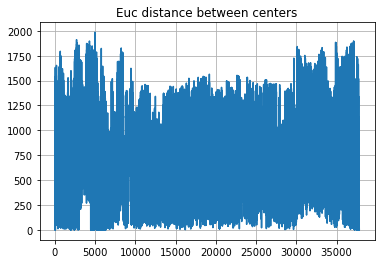

In [11]:
plt.Figure(figsize=(200,200))
plt.grid(True)
plt.title("Euc distance between centers")
plt.plot(deltas)

In [12]:
# df_all = df1.merge(df2.drop_duplicates(), on=['col1','col2'], 
#                    how='left', indicator=True)
# df_all


df_all = my_df.merge(ufo_df.drop_duplicates(), on=['file','cell_id'], 
                   how='left', indicator=True)
df_all

,Unnamed: 0_x,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,...,rect_shape_diameter,rect_shape_height,rect_shape_width,rect_x_max,rect_x_min,rect_y_max,rect_y_min,size,solidity,_merge
0,0,/run/media/mateusz/Seagate Expansion Drive/all...,29,37,667,1021,698,1047,41.109610,9,...,44.045431,28.0,34.0,703.0,669.0,1050.0,1022.0,74.0,0.540146,both
1,1,/run/media/mateusz/Seagate Expansion Drive/all...,5,78,517,120,540,132,23.259407,121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2,/run/media/mateusz/Seagate Expansion Drive/all...,4,112,1170,844,1195,847,23.194827,193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,3,/run/media/mateusz/Seagate Expansion Drive/all...,1,60,1531,362,1551,367,22.803509,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,4,/run/media/mateusz/Seagate Expansion Drive/all...,56,146,1629,1,1712,42,93.407708,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,4836,/run/media/mateusz/Seagate Expansion Drive/all...,29,35,1460,64,1463,103,42.190046,7,...,25.079872,25.0,2.0,1462.0,1460.0,93.0,68.0,25.0,0.454545,both
4881,4837,/run/media/mateusz/Seagate Expansion Drive/all...,28,39,909,937,941,1010,78.790862,12,...,66.309879,61.0,26.0,935.0,909.0,1010.0,949.0,55.0,0.369128,both
4882,4838,/run/media/mateusz/Seagate Expansion Drive/all...,28,40,1133,867,1165,956,93.048375,13,...,78.771822,74.0,27.0,1160.0,1133.0,956.0,882.0,46.0,0.258427,both
4883,4839,/run/media/mateusz/Seagate Expansion Drive/all...,28,33,1574,774,1590,803,32.249031,6,...,16.552945,15.0,7.0,1587.0,1580.0,799.0,784.0,18.0,0.486486,both


In [13]:
lookup = df_all['_merge'] == 'left_only'

diff = []
for idx, row in df_all.iterrows():
    if lookup[idx]:
        diff.append(row)


diff = pd.DataFrame(diff, columns=df_all.columns)
diff

,Unnamed: 0_x,file,start_frame,end_frame,box_up_left_x,box_up_left_y,box_down_right_x,box_down_right_y,length,count,...,rect_shape_diameter,rect_shape_height,rect_shape_width,rect_x_max,rect_x_min,rect_y_max,rect_y_min,size,solidity,_merge
1,1,/run/media/mateusz/Seagate Expansion Drive/all...,5,78,517,120,540,132,23.259407,121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,2,/run/media/mateusz/Seagate Expansion Drive/all...,4,112,1170,844,1195,847,23.194827,193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,3,/run/media/mateusz/Seagate Expansion Drive/all...,1,60,1531,362,1551,367,22.803509,93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,4,/run/media/mateusz/Seagate Expansion Drive/all...,56,146,1629,1,1712,42,93.407708,89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9,9,/run/media/mateusz/Seagate Expansion Drive/all...,27,32,786,689,788,726,36.013886,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852,4808,/run/media/mateusz/Seagate Expansion Drive/all...,37,47,1218,810,1270,878,84.386018,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4853,4809,/run/media/mateusz/Seagate Expansion Drive/all...,51,54,1184,908,1195,923,21.840330,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4863,4819,/run/media/mateusz/Seagate Expansion Drive/all...,43,49,202,365,225,417,58.309519,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4875,4831,/run/media/mateusz/Seagate Expansion Drive/all...,25,43,83,166,99,308,140.911320,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [14]:
%matplotlib inline

import cv2
diff = df_all[df_all['_merge'] == 'left_only']



ERR: to many frames


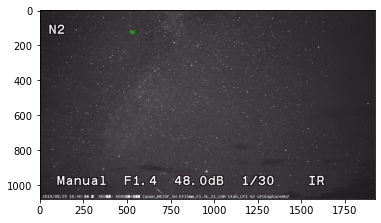

In [15]:

def save_both(df, row_idx):
    a = ca.prepare_trigger_frame(ca.TriggerInfo.from_csv_row(df.iloc[row_idx]) )
    row = df.iloc[row_idx]

    cv2.rectangle(a, (row['rect_x_max'], row['rect_y_max']), (row['rect_x_min'], row['rect_y_min']), (255, 0, 0), 2)
    return a



plt.imshow(save_both(merged_df,2))
# # show_raw(filename, start_frame, end_frame, rect_start, rect_stop, size=(1920 // 120, 1080 // 120)):
# b = ca.show_raw(row["file"], 0, None, (row['rect_x_max'], row['rect_y_max']), (row['rect_x_min'], row['rect_y_min']))

In [16]:
from collections import namedtuple

Rect = namedtuple('Rect', ["xmin", "ymin","xmax",'ymax' ])


# adapted from https://stackoverflow.com/a/27162334
def intersected_area(a, b): # returns None if rectangles don't intersect
    dx = min(a.xmax, b.xmax) - max(a.xmin, b.xmin)
    dy = min(a.ymax, b.ymax) - max(a.ymin, b.ymin)
    if (dx>=0) and (dy>=0):
        return dx*dy
    return 0

def area(rect):
    a = (rect.xmax - rect.xmin)
    b = (rect.ymax - rect.ymin)
    if a == 0:
        a = 1
    if b == 0:
        b = 1
    return a * b


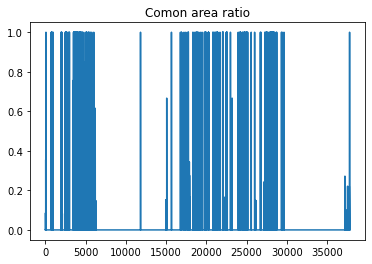

In [17]:

areas = []
for idx, row in merged_df.iterrows():
    a = Rect(row["box_up_left_x"], row["box_up_left_y"],
             row["box_down_right_x"], row["box_down_right_y"])

    b = Rect(row['rect_x_max'], row['rect_x_min'], row['rect_y_max'], row['rect_y_min'])

    smaller_area = min(area(a),area(b))

    if smaller_area == 0:
        print(a, b)

    ratio = intersected_area(a,b)/smaller_area
    areas.append(ratio)
    if ratio > 0.1:
        pass
        # print(f"saving {idx}")
        # plt.imsave(f"tmp/{ca.TriggerInfo.from_csv_row(merged_df.iloc[idx]).get_uid()}.png", save_both(merged_df,idx))

# plt.yscale('log')
plt.title("Comon area ratio")
plt.plot(areas)

In [18]:
len([area for area in areas if area > 0.1])

454

(array([3.7241e+04, 2.7000e+01, 2.5000e+01, 1.4000e+01, 1.5000e+01,
        1.1000e+01, 1.1000e+01, 6.0000e+00, 6.0000e+00, 4.0000e+00,
        5.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        8.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        5.0000e+00, 4.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.00

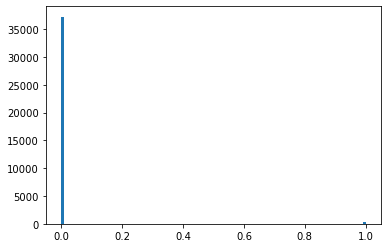

In [19]:
plt.hist(areas,bins=100)

In [20]:
filtered = [ratio for ratio in areas if ratio > 0.1]

(array([ 30.,  18.,  15.,   6.,   9.,   5.,   7.,   7.,   7., 350.]),
 array([0.10138249, 0.19124424, 0.28110599, 0.37096774, 0.46082949,
        0.55069124, 0.640553  , 0.73041475, 0.8202765 , 0.91013825,
        1.        ]),
 <BarContainer object of 10 artists>)

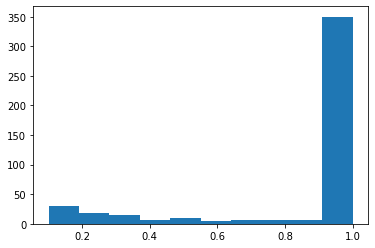

In [21]:
plt.hist(filtered)

In [34]:

%matplotlib
print(merged_df.iloc[13])

ca.TriggerInfo.from_csv_row(merged_df.iloc[13]).animate()



Using matplotlib backend: TkAgg
Unnamed: 0_x                                                              11
file                       /run/media/mateusz/Seagate Expansion Drive/all...
start_frame                                                               34
end_frame                                                                 44
box_up_left_x                                                            438
box_up_left_y                                                            911
box_down_right_x                                                         484
box_down_right_y                                                         959
length                                                             65.764732
count                                                                     11
cell_id_x                                                              115.0
center_x                                                               461.0
center_y                                    